In [129]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [130]:
df1 = pd.read_csv('gdp.csv')
df2 = pd.read_csv('pop.csv')
df3 = pd.read_csv('data-pvLFI.csv')
df4 = pd.read_csv('World firearms murders and ownership - Sheet 1.csv')

In [131]:
df1.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,1.946902e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,8.963316e+10,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,1.192689e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,NaN,NaN


In [132]:
df3.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [133]:
df1 = df1[['Country', '2012']]
df2 = df2[['Country', '2012']]

In [134]:
df1 = df1.rename(columns = {'2012': 'gdp'})
df2 = df2.rename(columns = {'2012': 'pop'})

In [135]:
df4 = df4.drop(['ISO code', 'Source'], axis=1)

In [136]:
merged = df1.merge(df2, left_on='Country', right_on='Country', how='inner')

In [137]:
merged2 = merged.merge(df3, left_on='Country', right_on='Country', how='inner')

In [138]:
df = merged2.merge(df4, left_on='Country', right_on='Country/Territory', how='inner')

In [139]:
df.head()

,Country,gdp,pop,Guns/100 inhabitants,Number of mass shootings,Country/Territory,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Australia,1.538194e+12,22728254.0,15.0,4,Australia,11.5,30.0,0.14,42.0,15.0,3050000.0
1,Austria,4.074516e+11,8429991.0,30.4,1,Austria,29.5,18.0,0.22,14.0,30.4,2500000.0
2,Canada,1.824289e+12,34750545.0,30.8,4,Canada,32.0,173.0,0.51,13.0,30.8,9950000.0
3,Switzerland,6.650541e+11,7996861.0,45.7,2,Switzerland,72.2,57.0,0.77,3.0,45.7,3400000.0
4,Germany,3.543984e+12,80425823.0,30.3,7,Germany,26.3,158.0,0.19,15.0,30.3,25000000.0


# Number of Mass Shootings vs GDP

(-4.3551090146188205, 91.173992765420536)

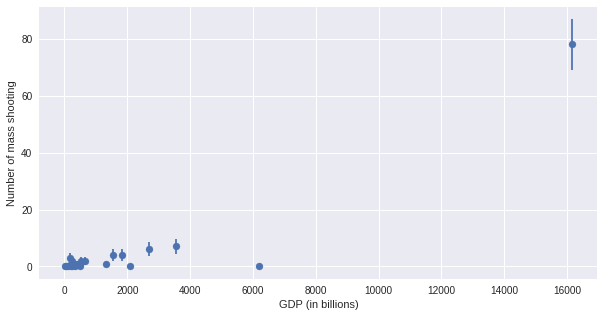

In [140]:
fig = plt.figure(figsize=(10,5)) 
#ax = fig.add_subplot(111)

scatter = plt.scatter(df.gdp / 1e9, df['Number of mass shootings'])
plt.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
plt.xlabel("GDP (in billions)")
plt.ylabel("Number of mass shooting")
plt.ylim()


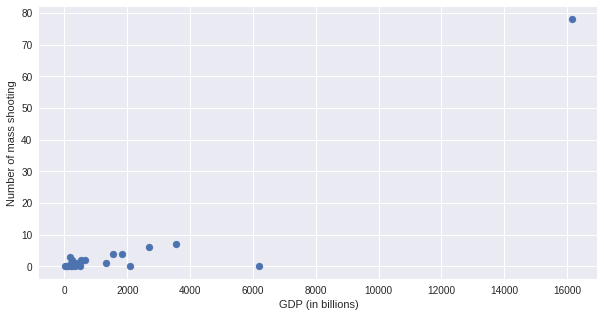

In [182]:
fig = plt.figure(figsize=(10,5)) 
#ax = fig.add_subplot(111)

scatter = plt.scatter(df.gdp / 1e9, df['Number of mass shootings'])
plt.errorbar(df.gdp / 1e9, df['Number of mass shootings'], fmt = '.')
plt.xlabel("GDP (in billions)")
plt.ylabel("Number of mass shooting")

# plot the average number of civilian fire arms per person

(array([ 5.,  5.,  2.,  7.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([ 0.006 ,  0.0942,  0.1824,  0.2706,  0.3588,  0.447 ,  0.5352,
         0.6234,  0.7116,  0.7998,  0.888 ]),
 <a list of 10 Patch objects>)

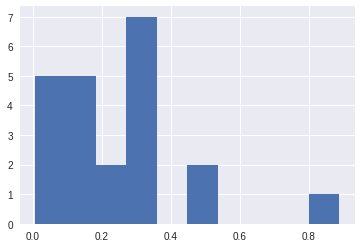

In [191]:
plt.hist(df['Average firearms per 100 people'] * 1e-2)

In [141]:
df['shootingspp'] = df["Number of mass shootings"] / df['pop'] * 1e3

# average number of homicide by fire arms per person

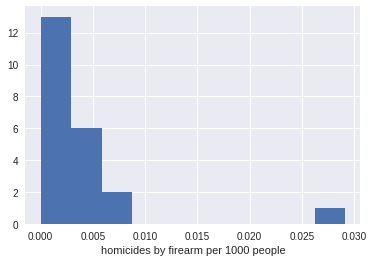

In [197]:

plt.hist(df['Number of homicides by firearm'] / df['pop'] * 1000)
plt.xlabel('homicides by firearm per 1000 people');

# Avg Number of homicides by  Firearmper person against GDP

(-0.1586071730528813, 0.21686225086014604)

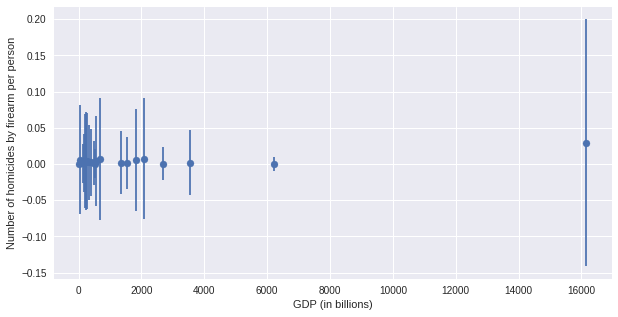

In [144]:
fig = plt.figure(figsize=(10,5)) 
#ax = fig.add_subplot(111)

scatter = plt.scatter(df.gdp / 1e9, df['Number of homicides by firearm'] / df['pop'] * 1000)
plt.errorbar(df.gdp / 1e9, df['Number of homicides by firearm'] / df['pop'] * 1000, 
            yerr = np.sqrt(df['Number of homicides by firearm'] /df['pop'] * 1000.0), fmt = '.')
plt.xlabel("GDP (in billions)")
plt.ylabel("Number of homicides by firearm per person")
plt.ylim()

(-0.015621204023916003, 0.044748742927548345)

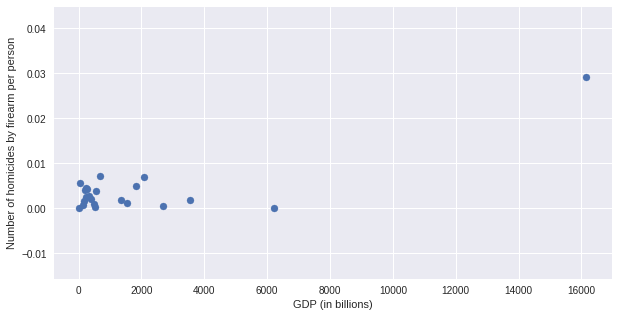

In [188]:
fig = plt.figure(figsize=(10,5)) 
#ax = fig.add_subplot(111)

scatter = plt.scatter(df.gdp / 1e9, df['Number of homicides by firearm'] / df['pop'] * 1000)
plt.errorbar(df.gdp / 1e9, df['Number of homicides by firearm'] / df['pop'] * 1000), fmt = '.')
plt.xlabel("GDP (in billions)")
plt.ylabel("Number of homicides by firearm per person")
plt.ylim()

# number of homicides by fire arm against the number of civilian firearms

(-462.0952570577046, 9703.7171016702196)

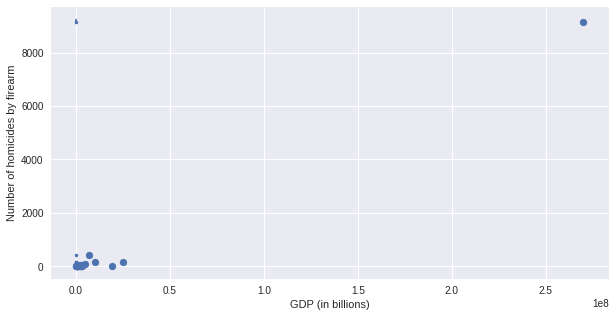

In [193]:
fig = plt.figure(figsize=(10,5)) 
#ax = fig.add_subplot(111)

scatter = plt.scatter(df['Average total all civilian firearms']
                      , df['Number of homicides by firearm'] )
plt.errorbar(df.gdp / 1e9, df['Number of homicides by firearm'], 
            yerr = np.sqrt(df['Number of homicides by firearm']), fmt = '.')
plt.xlabel("GDP (in billions)")
plt.ylabel("Number of homicides by firearm")
plt.ylim()

# Number of mass shootings against the number of civilian firearms

(-4.3551090146188205, 91.173992765420536)

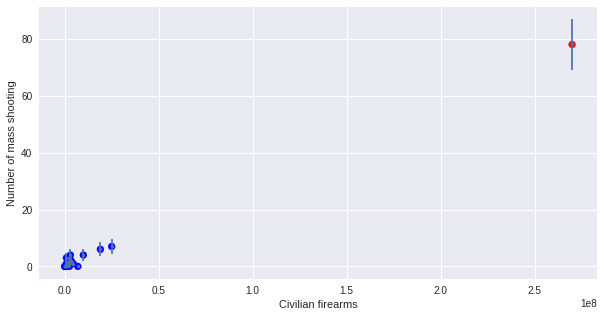

In [201]:
fig = plt.figure(figsize=(10,5)) 
#ax = fig.add_subplot(111)
colors = ['b'] * (df.shape[0] - 1)
colors.append('r')
scatter = plt.scatter(df['Average total all civilian firearms'], df['Number of mass shootings'], c = colors)
plt.errorbar(df['Average total all civilian firearms'], df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
plt.xlabel("Civilian firearms")
plt.ylabel("Number of mass shooting")
plt.ylim()

(-3.9177060338484186, 81.917706033848418)

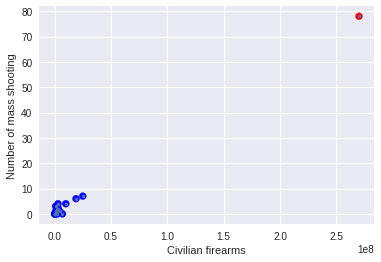

In [203]:
scatter = plt.scatter(df['Average total all civilian firearms'], df['Number of mass shootings'], c=colors)
plt.errorbar(df['Average total all civilian firearms'], df['Number of mass shootings'], fmt = '.')
plt.xlabel("Civilian firearms")
plt.ylabel("Number of mass shooting")
plt.ylim()

In [170]:
df['firearmspp'] = df['Average total all civilian firearms'] / (df['pop'])
df['shootingspp'] =(df['Number of mass shootings']/df['pop'] * 1e3)/(1e-4) 

In [171]:
lm = smf.ols('shootingspp ~ firearmspp', df).fit()

In [172]:
lm2 = smf.WLS(endog=df['shootingspp'], exog=df['firearmspp'], weights=1/abs(lm.resid)).fit()

In [173]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.715
Model:                            WLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     52.61
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           3.82e-07
Time:                        18:25:15   Log-Likelihood:                -25.428
No. Observations:                  22   AIC:                             52.86
Df Residuals:                      21   BIC:                             53.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
firearmspp     4.3506      0.600      7.253      0.000         3.103     5.598
==============================================================================
Omnibus:                        3.868   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.837
Skew:                           0.879   Prob(JB):                        0.242
Kurtosis:                       2.928   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
import seaborn as sns

In [175]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.715
Model:                            WLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     52.61
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           3.82e-07
Time:                        18:25:18   Log-Likelihood:                -25.428
No. Observations:                  22   AIC:                             52.86
Df Residuals:                      21   BIC:                             53.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
firearmspp     4.3506      0.600      7.253      0.000         3.103     5.598
==============================================================================
Omnibus:                        3.868   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.837
Skew:                           0.879   Prob(JB):                        0.242
Kurtosis:                       2.928   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

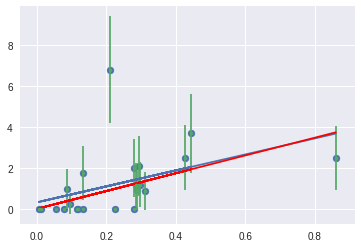

In [185]:
plt.scatter(df['firearmspp'] , df['shootingspp'], )
plt.plot(df['firearmspp'] , lm.predict() )
plt.errorbar(df['firearmspp'], df['shootingspp'], 
            yerr = np.sqrt(df['shootingspp'] * 1.0), fmt = '.')
plt.plot(df['firearmspp'] , lm2.predict() , c='r')

In [179]:
fit = np.polyfit(df['firearmspp'], df['shootingspp'], 1)

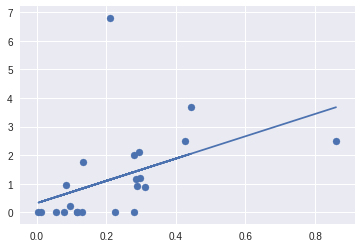

In [181]:
plt.plot(df['firearmspp'], fit[0]*df['firearmspp'] + fit[1])
plt.scatter(df['firearmspp'], df['shootingspp'])

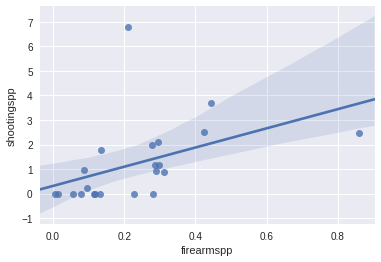

In [177]:
 sns.regplot(x="firearmspp", y="shootingspp", data=df)

In [178]:
import statsmodels.api as sm

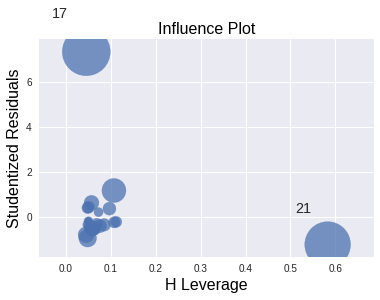

In [159]:
sm.graphics.influence_plot(lm, alpha  = 0.05, criterion="cooks");


,Country,gdp,pop,Guns/100 inhabitants,Number of mass shootings,Country/Territory,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,shootingspp,firearmspp
0,Australia,1.538194e+12,22728254.0,15.0,4,Australia,11.5,30.0,0.14,42.0,15.0,3050000.0,1.759924,0.134194
1,Austria,4.074516e+11,8429991.0,30.4,1,Austria,29.5,18.0,0.22,14.0,30.4,2500000.0,1.186241,0.296560
2,Canada,1.824289e+12,34750545.0,30.8,4,Canada,32.0,173.0,0.51,13.0,30.8,9950000.0,1.151061,0.286326
3,Switzerland,6.650541e+11,7996861.0,45.7,2,Switzerland,72.2,57.0,0.77,3.0,45.7,3400000.0,2.500981,0.425167
4,Germany,3.543984e+12,80425823.0,30.3,7,Germany,26.3,158.0,0.19,15.0,30.3,25000000.0,0.870367,0.310845
5,Denmark,3.271489e+11,5591572.0,12.0,0,Denmark,31.9,15.0,0.27,54.0,12.0,650000.0,0.000000,0.116246
6,Spain,1.335946e+12,46773055.0,10.4,1,Spain,21.8,90.0,0.20,61.0,10.4,4500000.0,0.213798,0.096209
7,Finland,2.567065e+11,5413971.0,45.3,2,Finland,19.8,24.0,0.45,4.0,45.3,2400000.0,3.694146,0.443298
8,France,2.681416e+12,65659790.0,31.2,6,France,9.6,35.0,0.06,12.0,31.2,19000000.0,0.913801,0.289370
9,Greece,2.456707e+11,11045011.0,22.5,0,Greece,34.9,29.0,0.26,23.0,22.5,2500000.0,0.000000,0.226347
